In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import model_from_json
import json

Importar datasets:

In [118]:
batch_size = 100

train_data_dir = r"C:\Users\david\OneDrive\Escritorio\cardataset\train"
validation_data_dir = r"C:\Users\david\OneDrive\Escritorio\cardataset\test"

train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1,
        )

validation_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1,
        )

test_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')


Found 2751 images belonging to 6 classes.
Found 452 images belonging to 6 classes.


Creación de las capas del modelo:

In [122]:

model = Sequential()


model.add(Conv2D(36, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200, 200, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(14, (3, 3), activation='relu'))
model.add(Conv2D(18, (3, 3), activation='relu'))
model.add(Conv2D(14, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(18, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(34, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax')) 



model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
epochs = 17

Creación y guardado del modelo:

In [123]:
h=model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        steps_per_epoch = 2751      //batch_size, #fotos que tengo train, pasos por época
        validation_steps=452      //batch_size #pasos por época en validación
)

json_string = model.to_json()
open(r'C:\Users\david\OneDrive\Escritorio\programas\model_architecture.json', 'w').write(json_string)

model.save_weights(r'C:\Users\david\OneDrive\Escritorio\programas\'model_weights.h5')

Epoch 1/17
27/27 [==============================] - 139s 5s/step - loss: 1.6947 - accuracy: 0.3459 - val_loss: 1.7007 - val_accuracy: 0.2425
Epoch 2/17
27/27 [==============================] - 125s 5s/step - loss: 1.6147 - accuracy: 0.3746 - val_loss: 1.5410 - val_accuracy: 0.3675
Epoch 3/17
27/27 [==============================] - 144s 5s/step - loss: 1.3811 - accuracy: 0.4647 - val_loss: 1.1805 - val_accuracy: 0.5900
Epoch 4/17
27/27 [==============================] - 139s 5s/step - loss: 1.2096 - accuracy: 0.5289 - val_loss: 1.1432 - val_accuracy: 0.6100
Epoch 5/17
27/27 [==============================] - 132s 5s/step - loss: 1.0901 - accuracy: 0.5741 - val_loss: 0.9572 - val_accuracy: 0.6625
Epoch 6/17
27/27 [==============================] - 134s 5s/step - loss: 1.0100 - accuracy: 0.6134 - val_loss: 0.9741 - val_accuracy: 0.6700
Epoch 7/17
27/27 [==============================] - 126s 5s/step - loss: 0.8957 - accuracy: 0.6582 - val_loss: 0.8350 - val_accuracy: 0.7150
Epoch 8/17
27

Visualización del modelo:

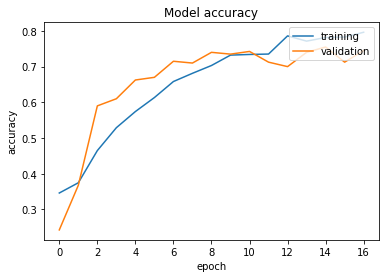

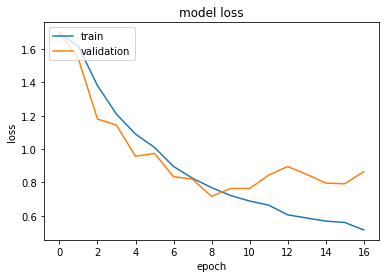

In [128]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Prueba de modelo:   

(200, 200, 3)
Car


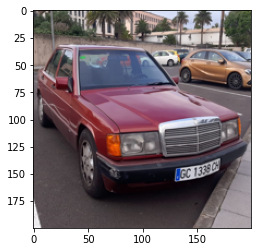

In [135]:

from matplotlib.pyplot import imshow
import json
import numpy as np
from tensorflow.keras.models import model_from_json
from PIL import Image



def one_hot_to_string(result):
    Sresults = ["Bycycle","Bus","Car","Motorcycle","Truck","Van"]
    for r in result:
        for i in range(r.size):
            if(r[i] == 1):
                print(Sresults[i])


model = model_from_json(open(r'C:\Users\david\OneDrive\Escritorio\programas\model_architecture.json').read())

model.load_weights(r'C:\Users\david\OneDrive\Escritorio\programas\'model_weights.h5')

%matplotlib inline
pil_im = Image.open(r'C:\Users\david\OneDrive\Escritorio\mercedes.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) 

im = im.reshape(1,200,200,3)

one_hot_to_string(model.predict(im))


2º Prueba

(200, 200, 3)
Car


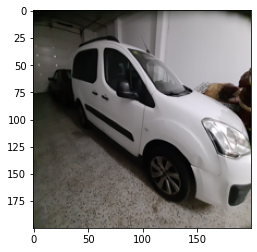

In [137]:


%matplotlib inline
pil_im = Image.open(r'C:\Users\david\OneDrive\Escritorio\furgoneta.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) 

im = im.reshape(1,200,200,3)

one_hot_to_string(model.predict(im))

3º Prueba

(200, 200, 3)
Bycycle


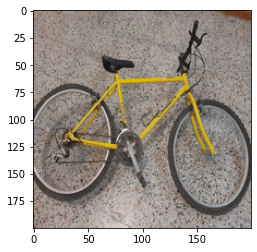

In [138]:
%matplotlib inline
pil_im = Image.open(r'C:\Users\david\OneDrive\Escritorio\bici.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) 

im = im.reshape(1,200,200,3)

one_hot_to_string(model.predict(im))